In [1]:
!pip install pandas
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('DelayedFlights.csv', index_col=0)

/Users/solwei/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

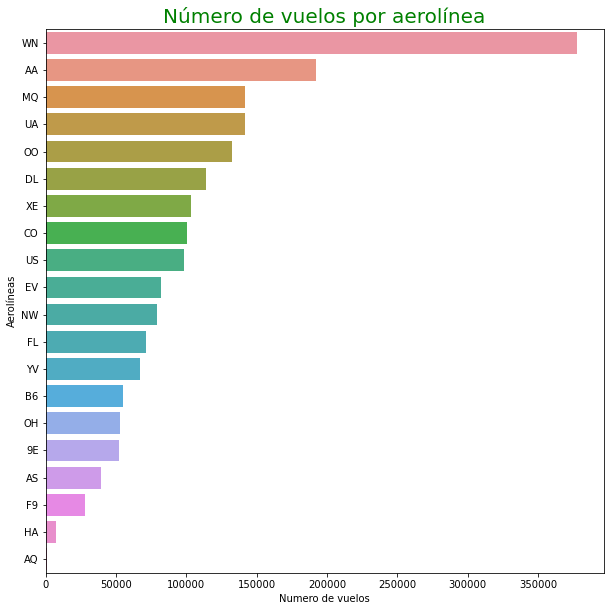

In [4]:
#Ejercicio 1
#Un gráfico que muestre la cantidad de vuelos según aerolínea.
title = "Número de vuelos por aerolínea"
plt.figure(figsize =(10, 10))
sns.countplot(y="UniqueCarrier", data=df, order=df['UniqueCarrier'].value_counts().index)
plt.title(title, fontsize=20, color= "Green")
plt.ylabel('Aerolíneas')
plt.xlabel('Numero de vuelos')
plt.savefig("imagen1.png")
plt.show()

In [5]:
#Distribución de vuelos que llegaron tarde, en mins.
"""
Desde el sprint 3, sabemos que:
1) la muestra es de 1,936,758
2) "ArrDelay" son los minutos de retraso y están expresados en números enteros
3) hay 8387 filas de "ArrDelay" que están en blanco.

Antes de graficar vamos a eliminar esas filas- ya que no es un nro significativo.
También usar la formula "1 + log en base 2 de n" para obtener el numero de bins.

"""
df.dropna(subset=["ArrDelay"])

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


<Figure size 720x720 with 0 Axes>

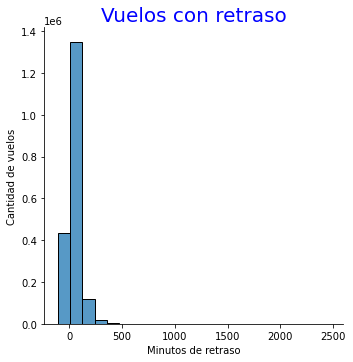

In [6]:
title = "Vuelos con retraso"
plt.figure(figsize =(10, 10))
axis = sns.displot(data=df, x="ArrDelay", bins= 22) #1 + log base 2 de 1928371 =22
plt.title(title, fontsize=20, color= "Blue")
plt.ylabel('Cantidad de vuelos')
plt.xlabel('Minutos de retraso')

plt.show()

Como es esperable, los datos se centran cerca de 0 (las aerolíneas trantan de tener 0 mins de retraso). Para entender más la informacion, hacemos una zoom in cerca de 0.

<Figure size 720x720 with 0 Axes>

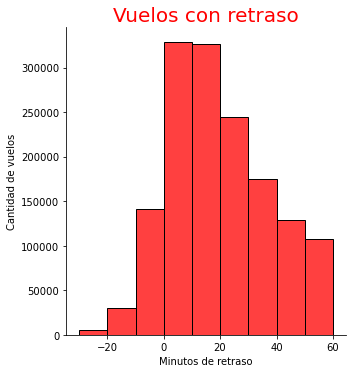

In [7]:
title = "Vuelos con retraso"
plt.figure(figsize =(10, 10))
axis = sns.displot(data=df, x="ArrDelay", bins=[-30,-20, -10, 0, 10, 20, 30, 40, 50, 60], color= "r") 
plt.title(title, fontsize=20, color= "r")
plt.ylabel('Cantidad de vuelos')
plt.xlabel('Minutos de retraso')
plt.savefig("imagen2.png")
plt.show()


Según la muestra, los mayoría de los retrasos ocurren hasta los 20 mins de la llegada prevista.

In [8]:
#Combinar Unique Carriers y ArrDelay
#Una manera es ver la distribucion de llegadas tardes por aerolineas.
df.dropna(subset=["ArrDelay"])

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


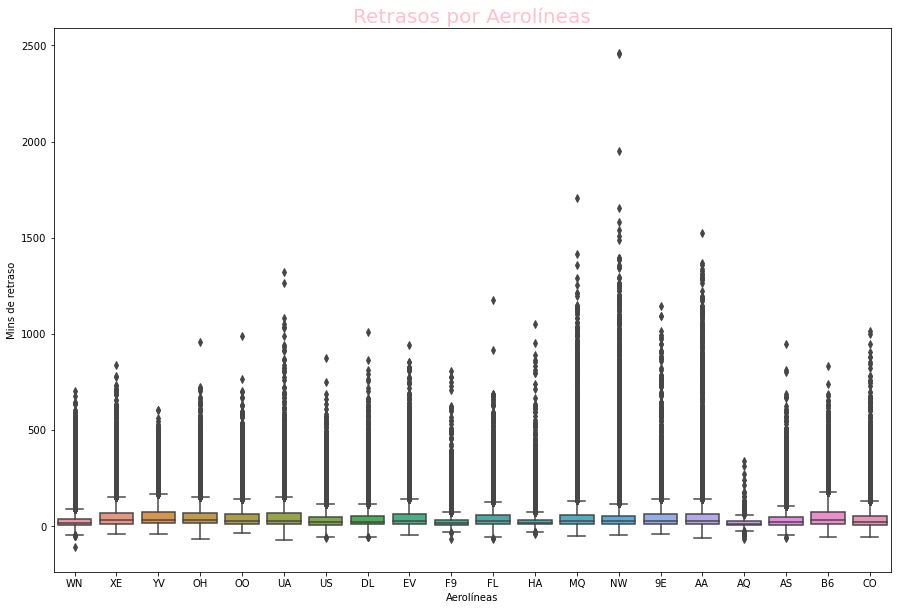

In [10]:
title= "Retrasos por Aerolíneas"
plt.figure(figsize =(15, 10))
axis= sns.boxplot( x=df["UniqueCarrier"], y=df["ArrDelay"])
plt.title(title, fontsize=20, color= "Pink")
plt.ylabel('Mins de retraso')
plt.xlabel('Aerolíneas')
plt.show()

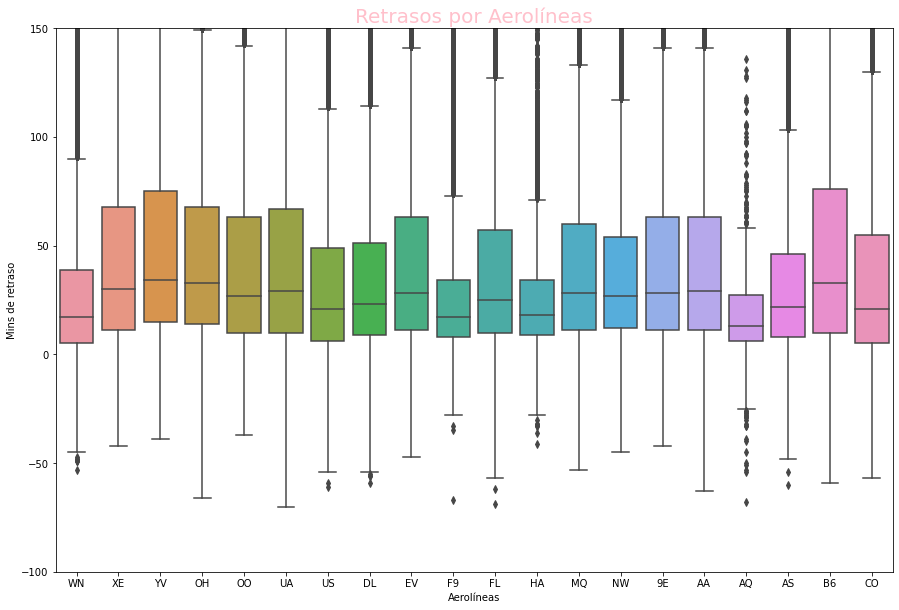

In [11]:
#Como era esperable, la muestra se centra alrededor de 0. Podemos hacer un zoom in para ver el detalle.
title= "Retrasos por Aerolíneas"
plt.figure(figsize =(15, 10))
axis= sns.boxplot(x=df["UniqueCarrier"], y=df["ArrDelay"])
plt.title(title, fontsize=20, color= "Pink")
plt.ylabel('Mins de retraso')
plt.xlabel('Aerolíneas')
plt.ylim([-100,150]) #elegido arbitrariamente
plt.savefig("Imagen3.png")
plt.show()

Se observa que en general, las aerolineas de la muestra llegan tarde.
Algunos como F9, HA, AQ tienen el median un poco más cerca del cero y el intervalo Q1-Q3 más corto, o sea,  
el 50% de sus observaciones se concentra en un rango más chico, es más consistente.

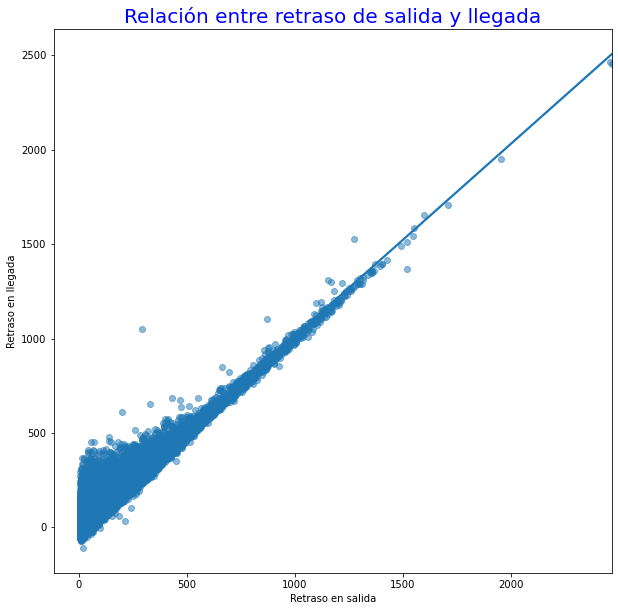

In [12]:
#Relación entre ArrDelay y DepDelay
df.dropna(subset=["ArrDelay"])

title = "Relación entre retraso de salida y llegada"
plt.figure(figsize =(10, 10))
sns.regplot(x=df["DepDelay"], y=df["ArrDelay"], scatter_kws={'alpha':0.5}, y_jitter= 0.1, x_jitter=0.1)
plt.title(title, fontsize=20, color= "Blue")
plt.ylabel('Retraso en llegada')
plt.xlabel('Retraso en salida')
plt.savefig("Imagen4.png")
plt.show()


Como era esperable, hay una correlación entre retrasos de salida y retraso de llegada.

In [13]:
#Relación entre 3 variables: ArrDelay, DepDelay, Unique Carrier
titulo= "Retrasos en salida y llegada por aerolineas"
r_salida_df= df[["UniqueCarrier", "DepDelay"]].copy()
r_salida_df.rename(columns={"DepDelay": "Retraso"}, inplace=True)
r_salida_df["Tipo"]= "Retraso salida"
r_llegada_df= df[["UniqueCarrier", "ArrDelay"]].copy()
r_llegada_df.rename(columns={"ArrDelay": "Retraso"}, inplace=True)
r_llegada_df["Tipo"]= "Retraso llegada"
data= pd.concat([r_salida_df, r_llegada_df])
del r_salida_df, r_llegada_df
data.dropna(inplace=True)
data.head()

,UniqueCarrier,Retraso,Tipo
0,WN,8.0,Retraso salida
1,WN,19.0,Retraso salida
2,WN,8.0,Retraso salida
4,WN,34.0,Retraso salida
5,WN,25.0,Retraso salida


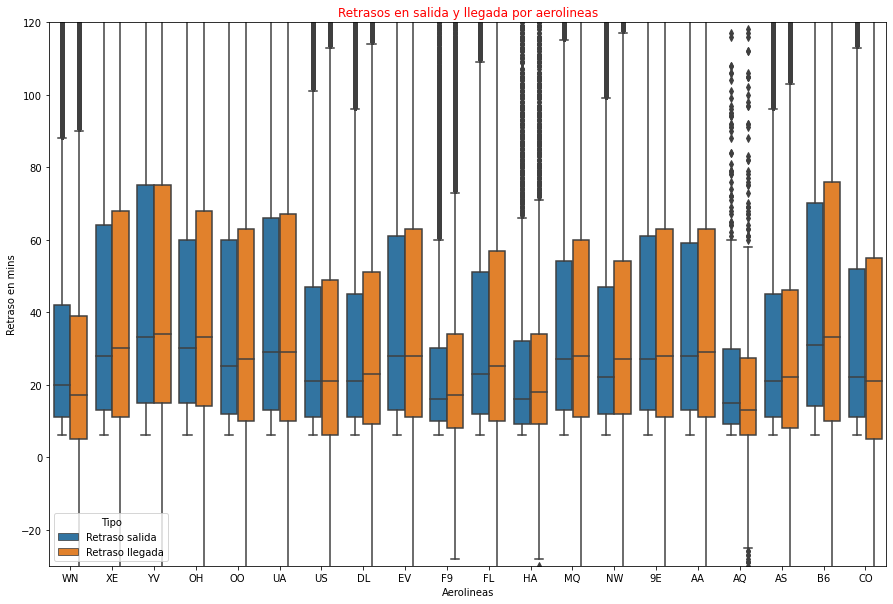

In [14]:
plt.figure(figsize=(15, 10))
sns.boxplot(x=data["UniqueCarrier"], y=data["Retraso"], hue=data["Tipo"])
plt.title(titulo, color="r")
plt.xlabel("Aerolineas")
plt.ylabel("Retraso en mins")
plt.ylim([-30,120])
plt.savefig("Imagen6.png")
plt.show()


In [15]:
#Visualizacion de 4 categorías: ArrDelay, DepDelay, Airtime, Unique Carrier.
titulo= "Retrasos en salida, llegada y tiempo de vuelo por aerolineas"
r_salida_df= df[["UniqueCarrier", "DepDelay"]].copy()
r_salida_df.rename(columns={"DepDelay": "Mins"}, inplace=True)
r_salida_df["Tipo"]= "Retraso salida"
r_llegada_df= df[["UniqueCarrier", "ArrDelay"]].copy()
r_llegada_df.rename(columns={"ArrDelay": "Mins"}, inplace=True)
r_llegada_df["Tipo"]= "Retraso llegada"
airtime_df=df[["UniqueCarrier", "AirTime"]].copy()
airtime_df.rename(columns={"AirTime": "Mins"}, inplace=True)
airtime_df["Tipo"]= "Tiempo de vuelo"

data1= pd.concat([r_salida_df, r_llegada_df, airtime_df])
del r_salida_df, r_llegada_df, airtime_df
data1.dropna(inplace=True)
data1.head()

,UniqueCarrier,Mins,Tipo
0,WN,8.0,Retraso salida
1,WN,19.0,Retraso salida
2,WN,8.0,Retraso salida
4,WN,34.0,Retraso salida
5,WN,25.0,Retraso salida


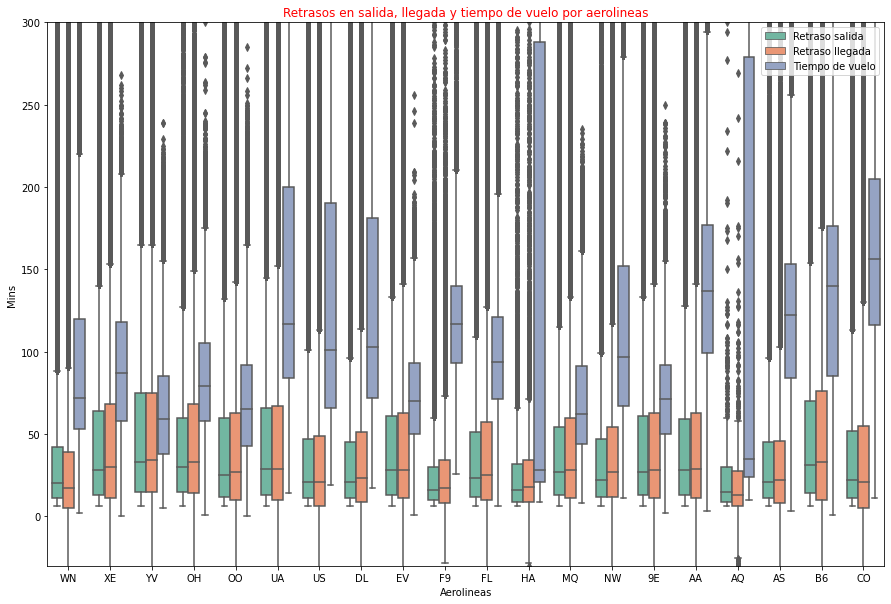

In [16]:
plt.figure(figsize=(15, 10))
sns.boxplot(x=data1["UniqueCarrier"], y=data1["Mins"], hue=data1["Tipo"], palette="Set2")
plt.title(titulo, color="r")
plt.xlabel("Aerolineas")
plt.ylabel("Mins")
plt.ylim([-30,300])
plt.legend(loc='upper right')
plt.savefig("Imagen8.png")
plt.show()

Muy interesante HA y AQ, a pesar de tener una distribución amplia de tiempo de vuelo, tiene un rango de retrasos (llegada y salida) corto.
*Seria interesante ver como son los retrasos por aerolinea por vuelos cortos vs transantlanticos. 